# 📝 Exercise M4.02

The goal of this exercise is to build an intuition on what will be the
parameters' values of a linear model when the link between the data and the
target is non-linear.

First, we will generate such non-linear data.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last"><tt class="docutils literal">np.random.RandomState</tt> allows to create a random number generator which can
be later used to get deterministic results.</p>
</div>

In [3]:
import numpy as np
# Set the seed for reproduction
rng = np.random.RandomState(0)

# Generate data
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = rng.rand(n_sample) * len_data - len_data / 2
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

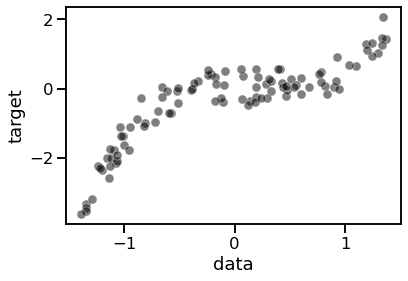

In [4]:
import pandas as pd
import seaborn as sns

full_data = pd.DataFrame({"data": data, "target": target})
_ = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

We observe that the link between the data `data` and vector `target` is
non-linear. For instance, `data` could represent to be the years of
experience (normalized) and `target` the salary (normalized). Therefore, the
problem here would be to infer the salary given the years of experience.

Using the function `f` defined below, find both the `weight` and the
`intercept` that you think will lead to a good linear model. Plot both the
data and the predictions of this model. Compute the mean squared error as
well.

In [5]:
def f(data, weight=0, intercept=0):
    target_predict = weight * data + intercept
    return target_predict

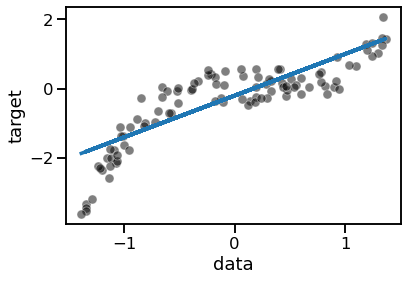

In [35]:
# Write your code here.: plot both the data and the model predictions
predictions = f(data, weight=1.2, intercept=-0.2)

ax = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                     alpha=0.5)
_ = ax.plot(data, predictions)



In [36]:
# Write your code here.: compute the mean squared error

from sklearn.metrics import mean_squared_error

model_error = mean_squared_error(target, predictions)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 0.38


Train a linear regression model and plot both the data and the predictions
of the model. Compute the mean squared error with this model.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">In scikit-learn, by convention <tt class="docutils literal">data</tt> (also called <tt class="docutils literal">X</tt> in the scikit-learn
documentation) should be a 2D matrix of shape <tt class="docutils literal">(n_samples, n_features)</tt>.
If <tt class="docutils literal">data</tt> is a 1D vector, you need to reshape it into a matrix with a
single column if the vector represents a feature or a single row if the
vector represents a sample.</p>
</div>

In [41]:
from sklearn.linear_model import LinearRegression

# Write your code here.: fit a linear regression
date_reshape = data.reshape(-1, 1)
linear_regression = LinearRegression()
linear_regression.fit(date_reshape , target)

predictions = linear_regression.predict(date_reshape)


LinearRegression()

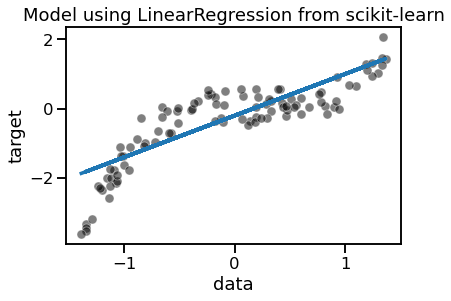

In [43]:
# Write your code here.: plot the data and the prediction of the linear
# regression model

import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                     alpha=0.5)
_ = ax.plot(date_reshape , predictions)
_ = plt.title("Model using LinearRegression from scikit-learn")


In [44]:
weight = linear_regression.coef_[0]
weight

1.2461760135319329

In [46]:
intercept = linear_regression.intercept_
intercept

-0.289304572282588

In [48]:
# Write your code here.: compute the mean squared error

from sklearn.metrics import mean_squared_error

model_error = mean_squared_error(target, predictions)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 0.38
